In [2]:
# import basics
from common.distances import City, distance_par_nom


In [3]:
def read_tsplib_path(tsp_path):
    ignorer = {"COMMENT", "NODE_COORD_SECTION", "EOF", "NAME", "TYPE", "DIMENSION", "DISPLAY_DATA_TYPE"}
    nom_distance = "EUC_2D"
    with open(tsp_path, "r") as tspf:
        lines = tspf.readlines()
        g = []
        for l in lines:
            line = l.strip()
            if not line:
                continue
            elif any(line.startswith(k) for k in ignorer):
                continue
            elif line.startswith("EDGE_WEIGHT_TYPE"):
                row = line.split(':')
                if len(row) >= 2:
                    nom_distance = row[1]
                continue
            else:
                row = line.split(' ')
                if row:
                    n = row[0]
                    x1 = float(row[1])
                    x2  = float(row[2])
                    g.append(City(x1, x2, n))
        return  g, distance_par_nom(nom_distance)

In [4]:
u16, d16 = read_tsplib_path("../tsplib/ulysses16.tsp")
assert 16 == len(u16)

In [5]:
# Extra 

#from PIL import Image
#im_cyclop = Image.open("cyclop.jpg")

In [6]:
# We use :
x_ordered, y_ordered = [x for  (_, y, x) in u16], [y for  (_, y, x) in u16]
n_points = 16
places_ordered = ["Ithaque"]+["??"]*15

In [7]:
# imports for the basic map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


C:\python\anaconda2019.10\envs\tipe\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


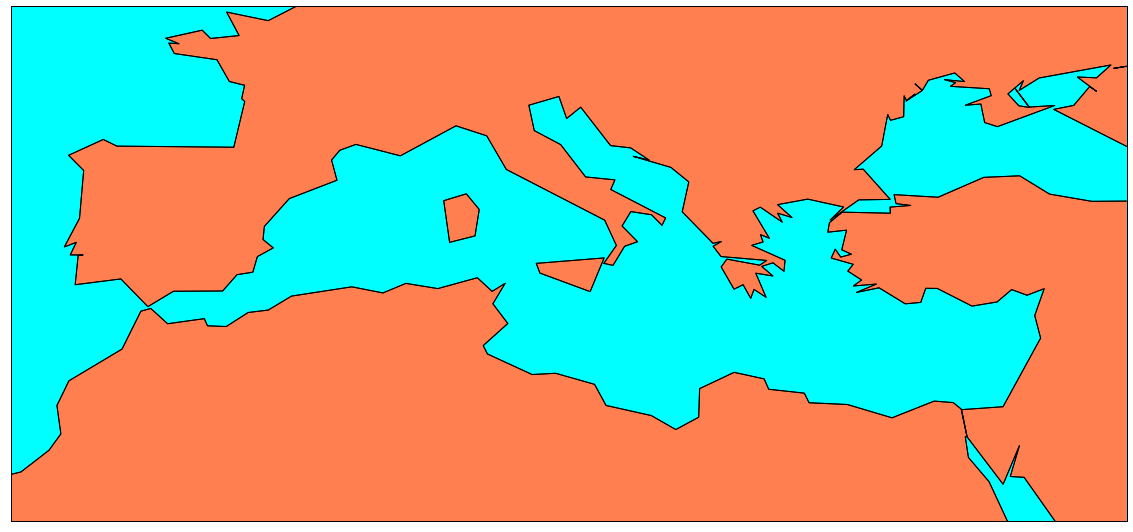

In [8]:
# Test plot : mediterranean

plt.figure(figsize=(20,10))

map = Basemap(llcrnrlon=-12,llcrnrlat=26,urcrnrlon=40,urcrnrlat=50)

map.drawcoastlines()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
plt.savefig('med.png')
plt.show()


In [13]:
# Our plot 

def plot_points(cities, **kwargs):
    xs = []
    ys = []
    ns = []
    nb_cities = len(cities)
    for (lat,lon,n) in cities:
        xs.append(lon)
        ys.append(lat)
        ns.append(n)
        
    plt.figure(figsize=(20,10))

    map = Basemap(llcrnrlon=-12,llcrnrlat=30,urcrnrlon=40,urcrnrlat=47)

    map.drawcoastlines()
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='coral',lake_color='aqua', alpha=1)


    # Plot way between them
    #colors=cm.nipy_spectral(np.linspace(0,1,n_points))
    delta = 2.0
    for i in range(nb_cities):
        x_origin, y_origin = xs[i], ys[i]
        x_dest, y_dest = xs[(i+1) % nb_cities], ys[(i+1) % nb_cities]
        plt.arrow(x_origin, y_origin,
                  x_dest-x_origin,
                  y_dest-y_origin,
                  fc="k", #ec=colors[i], 
                  length_includes_head=True,
                  linestyle=":",
                  linewidth=4, head_width=0.5, head_length=0.7, 
                  alpha=0.6,zorder=3)

    # Plot points
    map.scatter(xs, ys, color='red', s=200, alpha=1, zorder=2)


    # Plot Names
    delta= 0.3
    #props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    for c, (name, x, y) in enumerate(zip(ns ,xs, ys), start=1):
        label = f"{name}#{c}"
        plt.text(x-3*delta, y+delta+1, label, size=20)

    # Add images : Lara dessin
    #im_cyclop = np.array(Image.open("cyclop.jpg"))
    #plt.imshow(im_cyclop, extent=(23, 27, 33, 37), zorder=1, cmap="Greys_r")

    plt.savefig('med_ulysses.png')
    plt.show()


C:\python\anaconda2019.10\envs\tipe\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


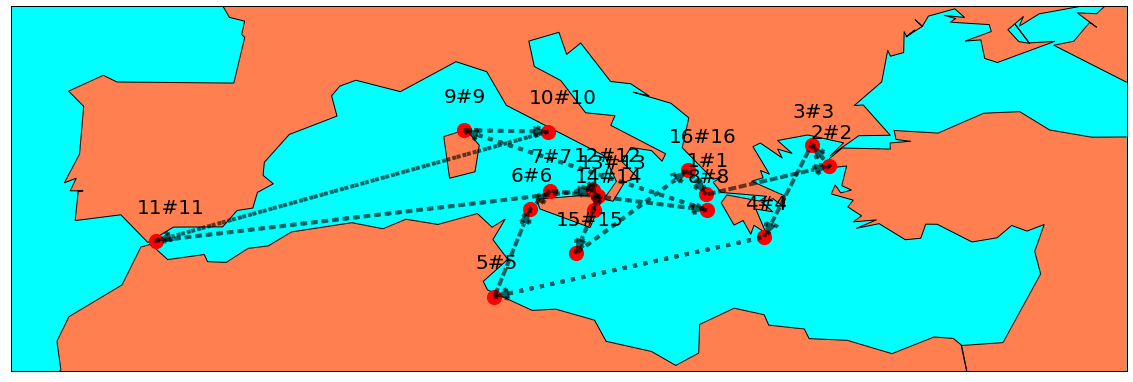

In [14]:
plot_points(u16)